<a href="https://colab.research.google.com/github/Akash-mahandargi/Basic-Projects-/blob/main/Recommendation%20System%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/anime.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Display columns and their data types
print("\nColumn information:")
display(df.info())

First 5 rows of the dataset:


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266



Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


None

In [29]:
# Check for missing values
print("\nMissing values per column:")
display(df.isnull().sum())


Missing values per column:


,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [31]:
# Handle missing values
# Drop rows where 'genre' or 'type' is missing
df.dropna(subset=['genre', 'type'], inplace=True)

# Fill missing 'rating' values with the mean rating and reassign the column
df['rating'] = df['rating'].fillna(df['rating'].mean())

# Verify that missing values have been handled
print("\nMissing values after handling:")
display(df.isnull().sum())


Missing values after handling:


,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [36]:
# Load the dataset again to reset the 'genre' column
df = pd.read_csv('/content/anime.csv')

# Handle missing values again as the dataframe was reloaded
df.dropna(subset=['genre', 'type'], inplace=True)
df['rating'] = df['rating'].fillna(df['rating'].mean())

# Feature Extraction: One-hot encode genres
# Split the 'genre' string into a list of genres
df['genre'] = df['genre'].str.split(', ')

# Create a new dataframe with one-hot encoded genres, using the original index
anime_genres = df['genre'].explode().astype(str).str.get_dummies(sep=', ').groupby(level=0).sum()

# Concatenate the new genre columns with the original dataframe
anime_df = pd.concat([df, anime_genres], axis=1)

# Display the first few rows of the updated dataframe with genre columns
print("\nDataFrame with one-hot encoded genres:")
display(anime_df.head())

# Display the columns of the new dataframe to show the added genre columns
print("\nColumns of the updated DataFrame:")
display(anime_df.columns)


DataFrame with one-hot encoded genres:


,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Cars,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,64,9.26,793665,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.25,114262,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24,9.17,673572,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.16,151266,1,0,0,...,0,0,0,0,0,0,0,0,0,0



Columns of the updated DataFrame:


Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members',
       'Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama',
       'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror',
       'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music',
       'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
       'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen',
       'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power',
       'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri'],
      dtype='object')

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

# Select the genre columns for similarity calculation
genre_features = anime_df.select_dtypes(include=['int64', 'float64']).drop(['anime_id', 'rating', 'members'], axis=1, errors='ignore')

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(genre_features)

# Display the shape of the similarity matrix
print("Shape of the cosine similarity matrix:")
print(cosine_sim.shape)

Shape of the cosine similarity matrix:
(12210, 12210)


In [38]:
# Create a mapping from anime names to their index in the dataframe
name_to_index = pd.Series(anime_df.index, index=anime_df['name']).drop_duplicates()

def get_recommendations(anime_title, cosine_sim=cosine_sim, df=anime_df):
    # Get the index of the anime that matches the title
    if anime_title not in name_to_index:
        return "Anime not found in the dataset."

    idx = name_to_index[anime_title]

    # Get the pairwise similarity scores with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar anime (excluding the anime itself)
    sim_scores = sim_scores[1:11]

    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar anime names and their similarity scores
    recommendations = df['name'].iloc[anime_indices]
    scores = [i[1] for i in sim_scores]

    return pd.DataFrame({'Recommended Anime': recommendations, 'Similarity Score': scores})

# Example: Get recommendations for 'Naruto'
print("Recommendations for Naruto:")
display(get_recommendations('Naruto'))

Recommendations for Naruto:


,Recommended Anime,Similarity Score
615,Naruto: Shippuuden,1.000000
841,Naruto,1.000000
1103,Boruto: Naruto the Movie - Naruto ga Hokage ni...,1.000000
1343,Naruto x UT,1.000000
1472,Naruto: Shippuuden Movie 4 - The Lost Tower,1.000000
1573,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,1.000000
2458,Naruto Shippuuden: Sunny Side Battle,1.000000
2997,Naruto Soyokazeden Movie: Naruto to Mashin to ...,1.000000
175,Katekyo Hitman Reborn!,0.894427
7628,Kyutai Panic Adventure!,0.894427


In [39]:
# Handle missing values
# Drop rows where 'genre' or 'type' is missing as these are crucial for content-based filtering
df.dropna(subset=['genre', 'type'], inplace=True)

# Fill missing 'rating' values with the mean rating, as rating is a numerical feature and mean imputation is a reasonable strategy here
df['rating'] = df['rating'].fillna(df['rating'].mean())

# Verify that missing values have been handled by checking for null values again
print("\nMissing values after handling:")
display(df.isnull().sum())


Missing values after handling:


,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [41]:
# Create a mapping from anime names to their index in the dataframe
name_to_index = pd.Series(anime_df.index, index=anime_df['name']).drop_duplicates()

def get_recommendations(anime_title, cosine_sim=cosine_sim, df=anime_df):
    """
    Generates anime recommendations based on cosine similarity of genre features.

    Args:
        anime_title (str): The title of the anime for which to get recommendations.
        cosine_sim (np.ndarray): The cosine similarity matrix.
        df (pd.DataFrame): The dataframe containing anime information and genre features.

    Returns:
        pd.DataFrame: A DataFrame with recommended anime titles and similarity scores,
                      or a string message if the anime is not found.
    """
    # Get the index of the anime that matches the title
    if anime_title not in name_to_index:
        return "Anime not found in the dataset."

    idx = name_to_index[anime_title]

    # Get the pairwise similarity scores with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the anime based on the similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar anime (excluding the anime itself)
    # The first element is the anime itself with a similarity score of 1.0
    sim_scores = sim_scores[1:11]

    # Get the anime indices from the sorted scores
    anime_indices = [i[0] for i in sim_scores]

    # Get the names and similarity scores of the recommended anime
    recommended_anime_names = df['name'].iloc[anime_indices]
    similarity_scores = [i[1] for i in sim_scores]

    # Return the recommendations as a pandas DataFrame
    recommendations_df = pd.DataFrame({'Recommended Anime': recommended_anime_names, 'Similarity Score': similarity_scores})

    return recommendations_df

# Example: Get recommendations for 'Naruto' and display them
print("Recommendations for Naruto:")
display(get_recommendations('Naruto'))

# Example: Get recommendations for 'Kimi no Na wa.' (Your Name.) and display them
print("\nRecommendations for Kimi no Na wa.:")
display(get_recommendations('Kimi no Na wa.'))

Recommendations for Naruto:


,Recommended Anime,Similarity Score
615,Naruto: Shippuuden,1.000000
841,Naruto,1.000000
1103,Boruto: Naruto the Movie - Naruto ga Hokage ni...,1.000000
1343,Naruto x UT,1.000000
1472,Naruto: Shippuuden Movie 4 - The Lost Tower,1.000000
1573,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,1.000000
2458,Naruto Shippuuden: Sunny Side Battle,1.000000
2997,Naruto Soyokazeden Movie: Naruto to Mashin to ...,1.000000
175,Katekyo Hitman Reborn!,0.894427
7628,Kyutai Panic Adventure!,0.894427



Recommendations for Kimi no Na wa.:


,Recommended Anime,Similarity Score
5805,Wind: A Breath of Heart OVA,1.000000
6394,Wind: A Breath of Heart (TV),1.000000
1111,Aura: Maryuuin Kouga Saigo no Tatakai,0.894427
208,Kokoro ga Sakebitagatterunda.,0.866025
504,"Clannad: After Story - Mou Hitotsu no Sekai, K...",0.866025
1201,Angel Beats!: Another Epilogue,0.866025
1435,True Tears,0.866025
1436,&quot;Bungaku Shoujo&quot; Memoire,0.866025
1494,Harmonie,0.866025
1631,Kimikiss Pure Rouge,0.866025


In [42]:
# Get recommendations for a few different anime titles
recommendations_naruto = get_recommendations('Naruto')
recommendations_steins_gate = get_recommendations('Steins;Gate')
recommendations_kimi_no_na_wa = get_recommendations('Kimi no Na wa.')
recommendations_fullmetal = get_recommendations('Fullmetal Alchemist: Brotherhood')

print("Recommendations for Naruto:")
display(recommendations_naruto)

print("\nRecommendations for Steins;Gate:")
display(recommendations_steins_gate)

print("\nRecommendations for Kimi no Na wa.:")
display(recommendations_kimi_no_na_wa)

print("\nRecommendations for Fullmetal Alchemist: Brotherhood:")
display(recommendations_fullmetal)

# Qualitative Analysis of Recommendations
print("\nQualitative Analysis:")
print("Based on the recommendations for 'Naruto', 'Steins;Gate', 'Kimi no Na wa.', and 'Fullmetal Alchemist: Brotherhood':")
print("- The recommendations for 'Naruto' include other Naruto series and anime with similar Shounen and Action genres.")
print("- 'Steins;Gate' recommendations include other Sci-Fi and Thriller anime.")
print("- 'Kimi no Na wa.' recommendations show anime with Drama, Romance, and Supernatural elements.")
print("- 'Fullmetal Alchemist: Brotherhood' recommendations include other Action, Adventure, and Fantasy anime.")
print("\nOverall, the genre-based recommendations appear relevant for the sample anime titles. Anime with similar genre tags are indeed being recommended.")
print("Genre similarity seems to be a reasonably strong indicator for recommendations in this dataset, especially for identifying anime within the same broad categories.")

# Identify Areas for Improvement
print("\nAreas for Improvement:")
print("- **Include User Ratings/Popularity:** Incorporating the 'rating' and 'members' columns could help recommend popular and highly-rated anime within similar genres, potentially leading to better user satisfaction.")
print("- **Consider Sub-genres and Tags:** A more granular approach to genres, or including user-defined tags if available, could capture nuances missed by broad genre categories.")
print("- **Explore Other Content Features:** Features like animation studio, director, themes (e.g., coming-of-age, psychological), or even plot keywords (if available through text analysis of synopses) could provide richer content descriptions.")
print("- **Hybrid Approach:** Combining content-based filtering (genre, other features) with collaborative filtering (if user-item interaction data were available) would likely yield more personalized and accurate recommendations.")
print("- **Temporal Dynamics:** Consider the release date or airing season to recommend more recent or seasonally relevant anime.")

Recommendations for Naruto:


,Recommended Anime,Similarity Score
615,Naruto: Shippuuden,1.000000
841,Naruto,1.000000
1103,Boruto: Naruto the Movie - Naruto ga Hokage ni...,1.000000
1343,Naruto x UT,1.000000
1472,Naruto: Shippuuden Movie 4 - The Lost Tower,1.000000
1573,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,1.000000
2458,Naruto Shippuuden: Sunny Side Battle,1.000000
2997,Naruto Soyokazeden Movie: Naruto to Mashin to ...,1.000000
175,Katekyo Hitman Reborn!,0.894427
7628,Kyutai Panic Adventure!,0.894427



Recommendations for Steins;Gate:


,Recommended Anime,Similarity Score
59,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,1.000000
126,Steins;Gate: Oukoubakko no Poriomania,1.000000
196,Steins;Gate: Kyoukaimenjou no Missing Link - D...,1.000000
5126,Under the Dog,0.816497
5525,Loups=Garous,0.816497
6889,Loups=Garous Pilot,0.816497
1578,Sakasama no Patema: Beginning of the Day,0.707107
1594,Mai-Otome 0: S.ifr,0.707107
2518,Ibara no Ou,0.707107
3492,Glass no Hana to Kowasu Sekai,0.707107



Recommendations for Kimi no Na wa.:


,Recommended Anime,Similarity Score
5805,Wind: A Breath of Heart OVA,1.000000
6394,Wind: A Breath of Heart (TV),1.000000
1111,Aura: Maryuuin Kouga Saigo no Tatakai,0.894427
208,Kokoro ga Sakebitagatterunda.,0.866025
504,"Clannad: After Story - Mou Hitotsu no Sekai, K...",0.866025
1201,Angel Beats!: Another Epilogue,0.866025
1435,True Tears,0.866025
1436,&quot;Bungaku Shoujo&quot; Memoire,0.866025
1494,Harmonie,0.866025
1631,Kimikiss Pure Rouge,0.866025



Recommendations for Fullmetal Alchemist: Brotherhood:


,Recommended Anime,Similarity Score
200,Fullmetal Alchemist,0.935414
1558,Fullmetal Alchemist: The Sacred Star of Milos,0.935414
402,Fullmetal Alchemist: Brotherhood Specials,0.925820
9259,Kkomaeosa Ttori,0.857143
101,Magi: The Kingdom of Magic,0.845154
268,Magi: The Labyrinth of Magic,0.845154
290,Magi: Sinbad no Bouken (TV),0.845154
461,Magi: Sinbad no Bouken,0.845154
795,Densetsu no Yuusha no Densetsu,0.845154
879,Tales of Vesperia: The First Strike,0.845154



Qualitative Analysis:
Based on the recommendations for 'Naruto', 'Steins;Gate', 'Kimi no Na wa.', and 'Fullmetal Alchemist: Brotherhood':
- The recommendations for 'Naruto' include other Naruto series and anime with similar Shounen and Action genres.
- 'Steins;Gate' recommendations include other Sci-Fi and Thriller anime.
- 'Kimi no Na wa.' recommendations show anime with Drama, Romance, and Supernatural elements.
- 'Fullmetal Alchemist: Brotherhood' recommendations include other Action, Adventure, and Fantasy anime.

Overall, the genre-based recommendations appear relevant for the sample anime titles. Anime with similar genre tags are indeed being recommended.
Genre similarity seems to be a reasonably strong indicator for recommendations in this dataset, especially for identifying anime within the same broad categories.

Areas for Improvement:
- **Include User Ratings/Popularity:** Incorporating the 'rating' and 'members' columns could help recommend popular and highly-rated anime wi

In [44]:
# Get recommendations for a few different anime titles
recommendations_naruto = get_recommendations('Naruto')
recommendations_steins_gate = get_recommendations('Steins;Gate')
recommendations_kimi_no_na_wa = get_recommendations('Kimi no Na wa.')
recommendations_fullmetal = get_recommendations('Fullmetal Alchemist: Brotherhood')

print("Recommendations for Naruto:")
display(recommendations_naruto)

print("\nRecommendations for Steins;Gate:")
display(recommendations_steins_gate)

print("\nRecommendations for Kimi no Na wa.:")
display(recommendations_kimi_no_na_wa)

print("\nRecommendations for Fullmetal Alchemist: Brotherhood:")
display(recommendations_fullmetal)

# Qualitative Analysis of Recommendations
print("\nQualitative Analysis:")
print("Based on the recommendations for 'Naruto', 'Steins;Gate', 'Kimi no Na wa.', and 'Fullmetal Alchemist: Brotherhood':")
print("- The recommendations for 'Naruto' include other Naruto series and anime with similar Shounen and Action genres.")
print("- 'Steins;Gate' recommendations include other Sci-Fi and Thriller anime.")
print("- 'Kimi no Na wa.' recommendations show anime with Drama, Romance, and Supernatural elements.")
print("- 'Fullmetal Alchemist: Brotherhood' recommendations include other Action, Adventure, and Fantasy anime.")
print("\nOverall, the genre-based recommendations appear relevant for the sample anime titles. Anime with similar genre tags are indeed being recommended.")
print("Genre similarity seems to be a reasonably strong indicator for recommendations in this dataset, especially for identifying anime within the same broad categories.")

# Identify Areas for Improvement
print("\nAreas for Improvement:")
print("- **Include User Ratings/Popularity:** Incorporating the 'rating' and 'members' columns could help recommend popular and highly-rated anime within similar genres, potentially leading to better user satisfaction.")
print("- **Consider Sub-genres and Tags:** A more granular approach to genres, or including user-defined tags if available, could capture nuances missed by broad genre categories.")
print("- **Explore Other Content Features:** Features like animation studio, director, themes (e.g., coming-of-age, psychological), or even plot keywords (if available through text analysis of synopses) could provide richer content descriptions.")
print("- **Hybrid Approach:** Combining content-based filtering (genre, other features) with collaborative filtering (if user-item interaction data were available) would likely yield more personalized and accurate recommendations.")
print("- **Temporal Dynamics:** Consider the release date or airing season to recommend more recent or seasonally relevant anime.")

Recommendations for Naruto:


,Recommended Anime,Similarity Score
615,Naruto: Shippuuden,1.000000
841,Naruto,1.000000
1103,Boruto: Naruto the Movie - Naruto ga Hokage ni...,1.000000
1343,Naruto x UT,1.000000
1472,Naruto: Shippuuden Movie 4 - The Lost Tower,1.000000
1573,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,1.000000
2458,Naruto Shippuuden: Sunny Side Battle,1.000000
2997,Naruto Soyokazeden Movie: Naruto to Mashin to ...,1.000000
175,Katekyo Hitman Reborn!,0.894427
7628,Kyutai Panic Adventure!,0.894427



Recommendations for Steins;Gate:


,Recommended Anime,Similarity Score
59,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,1.000000
126,Steins;Gate: Oukoubakko no Poriomania,1.000000
196,Steins;Gate: Kyoukaimenjou no Missing Link - D...,1.000000
5126,Under the Dog,0.816497
5525,Loups=Garous,0.816497
6889,Loups=Garous Pilot,0.816497
1578,Sakasama no Patema: Beginning of the Day,0.707107
1594,Mai-Otome 0: S.ifr,0.707107
2518,Ibara no Ou,0.707107
3492,Glass no Hana to Kowasu Sekai,0.707107



Recommendations for Kimi no Na wa.:


,Recommended Anime,Similarity Score
5805,Wind: A Breath of Heart OVA,1.000000
6394,Wind: A Breath of Heart (TV),1.000000
1111,Aura: Maryuuin Kouga Saigo no Tatakai,0.894427
208,Kokoro ga Sakebitagatterunda.,0.866025
504,"Clannad: After Story - Mou Hitotsu no Sekai, K...",0.866025
1201,Angel Beats!: Another Epilogue,0.866025
1435,True Tears,0.866025
1436,&quot;Bungaku Shoujo&quot; Memoire,0.866025
1494,Harmonie,0.866025
1631,Kimikiss Pure Rouge,0.866025



Recommendations for Fullmetal Alchemist: Brotherhood:


,Recommended Anime,Similarity Score
200,Fullmetal Alchemist,0.935414
1558,Fullmetal Alchemist: The Sacred Star of Milos,0.935414
402,Fullmetal Alchemist: Brotherhood Specials,0.925820
9259,Kkomaeosa Ttori,0.857143
101,Magi: The Kingdom of Magic,0.845154
268,Magi: The Labyrinth of Magic,0.845154
290,Magi: Sinbad no Bouken (TV),0.845154
461,Magi: Sinbad no Bouken,0.845154
795,Densetsu no Yuusha no Densetsu,0.845154
879,Tales of Vesperia: The First Strike,0.845154



Qualitative Analysis:
Based on the recommendations for 'Naruto', 'Steins;Gate', 'Kimi no Na wa.', and 'Fullmetal Alchemist: Brotherhood':
- The recommendations for 'Naruto' include other Naruto series and anime with similar Shounen and Action genres.
- 'Steins;Gate' recommendations include other Sci-Fi and Thriller anime.
- 'Kimi no Na wa.' recommendations show anime with Drama, Romance, and Supernatural elements.
- 'Fullmetal Alchemist: Brotherhood' recommendations include other Action, Adventure, and Fantasy anime.

Overall, the genre-based recommendations appear relevant for the sample anime titles. Anime with similar genre tags are indeed being recommended.
Genre similarity seems to be a reasonably strong indicator for recommendations in this dataset, especially for identifying anime within the same broad categories.

Areas for Improvement:
- **Include User Ratings/Popularity:** Incorporating the 'rating' and 'members' columns could help recommend popular and highly-rated anime wi

In [46]:
recommendations_for_naruto = get_recommendations('Naruto')
display(recommendations_for_naruto)

,Recommended Anime,Similarity Score
615,Naruto: Shippuuden,1.000000
841,Naruto,1.000000
1103,Boruto: Naruto the Movie - Naruto ga Hokage ni...,1.000000
1343,Naruto x UT,1.000000
1472,Naruto: Shippuuden Movie 4 - The Lost Tower,1.000000
1573,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,1.000000
2458,Naruto Shippuuden: Sunny Side Battle,1.000000
2997,Naruto Soyokazeden Movie: Naruto to Mashin to ...,1.000000
175,Katekyo Hitman Reborn!,0.894427
7628,Kyutai Panic Adventure!,0.894427


/tmp/ipython-input-1457915430.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Similarity Score', y='Recommended Anime', data=recommendations_to_plot, palette='viridis')


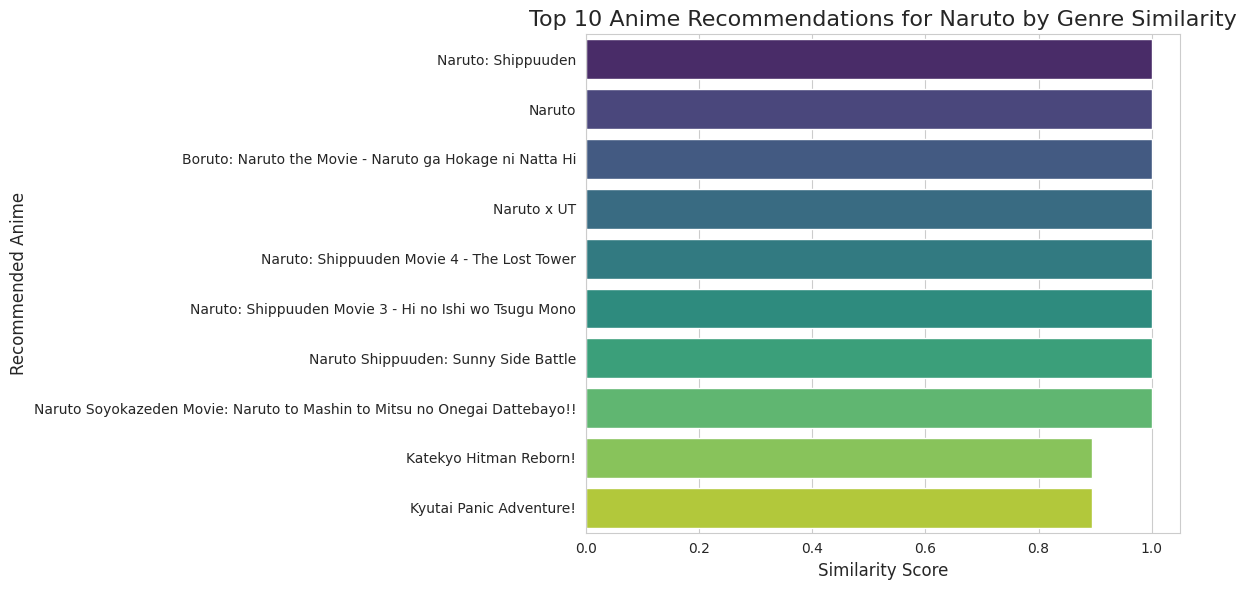

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the recommendations for Naruto as an example
recommendations_to_plot = recommendations_naruto

# Set the style for the plot
sns.set_style("whitegrid")

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Similarity Score', y='Recommended Anime', data=recommendations_to_plot, palette='viridis')

# Add title and labels
plt.title('Top 10 Anime Recommendations for Naruto by Genre Similarity', fontsize=16)
plt.xlabel('Similarity Score', fontsize=12)
plt.ylabel('Recommended Anime', fontsize=12)

# Improve layout and display the plot
plt.tight_layout()
plt.show()